# Newman Girvan

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr

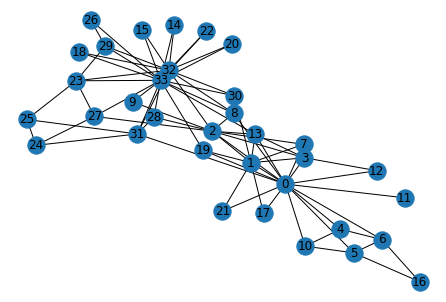

In [4]:
G = nx.karate_club_graph()
nx.draw(G,with_labels=True)
G

Premièrement attribution des poids sur les sommets, en partant d'un point précis.

In [2]:
def attrib_pds_som(G,sommet_debut):
#retourne le poids des points et la distance pour l'utiliser sur la fonction suivante.
    poids_sommet={}
    dist_sommet={}
    parcouru=[sommet_debut]
    #initialisation de poids des sommets à 0.
    for i in range (0,len(G.nodes())):
        poids_sommet[i]=0
        dist_sommet[i]=0

    #attribution du poids 1 au sommet de base ainsi qu'à ses voisins.
    poids_sommet[sommet_debut]=1
    a_parcourir=[]
    for i in G.neighbors(sommet_debut):
        poids_sommet[i]=1
        dist_sommet[i]=1
        parcouru.append(i)
        a_parcourir.append(i)

    #mise en place d'une boucle afin de parcourir tout les points.
    voisin_dessous=True
    while voisin_dessous:
        a_parcourir_bis=[]
        test=False
        for sommet in a_parcourir:
            #permet de connaitre la longeur du dictionnaire
            sum=0
            for i in G.neighbors(sommet): sum+=1
            if sum!=0:
                for i in G.neighbors(sommet):
                    if i not in parcouru:
                        poids_sommet[i]=poids_sommet[sommet]
                        dist_sommet[i]=dist_sommet[sommet]+1
                        a_parcourir_bis.append(i)
                        parcouru.append(i)
                    else:
                        if dist_sommet[i]==dist_sommet[sommet]+1:
                            poids_sommet[i]=poids_sommet[i]+1
                    test=True
        if test==False: voisin_dessous=False 
        a_parcourir=[]
        a_parcourir=a_parcourir_bis
        
    return poids_sommet,dist_sommet


#attrib_pds_som(G,0)

Ensuite remontée afin de mettre des poids sur les arètes.

In [3]:
def poids_arete_som(G, sommet_debut):
    poids_arete={}
    poids_sommet,dist_sommet=attrib_pds_som(G,sommet_debut)
    #calcul de la distance la plus grande.
    maxi = None
    for k in dist_sommet:
        if dist_sommet[k]!=None:
            if maxi is None or dist_sommet[k] > maxi:
                maxi = dist_sommet[k]

    #Premièrement, on traite les points les plus loin du sommet de départ
    if maxi!=0:
        parcouru=[]
        for sommet,dist in dist_sommet.items():
            if dist==maxi:
                parcouru.append(sommet)
                for i in G.neighbors(sommet):
                    poids_arete[i,sommet]=poids_sommet[i]/poids_sommet[sommet]
        
        for j in range(maxi-1,0,-1):
            for sommet,dist in dist_sommet.items():
                if dist == j:
                    parcouru.append(sommet)
                    voisins=[]
                    for i in G.neighbors(sommet):
                        voisins.append(i)
                    somme=0
                    for k in voisins:
                        if k in parcouru and dist_sommet[k]!=dist_sommet[sommet]:
                            somme+=poids_arete[sommet,k]
                    for k in voisins:
                        if k not in parcouru and dist_sommet[k]!=dist_sommet[sommet]:
                            poids_arete[k,sommet]=(1+somme)*(poids_sommet[k]/poids_sommet[sommet])
                    
    
    return poids_arete
            

({0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 3}, {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3})

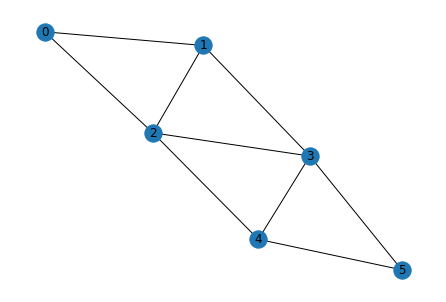

In [42]:
G_test = nx.Graph()

G_test.add_node(0)
G_test.add_node(1)
G_test.add_node(2)
G_test.add_node(3)
G_test.add_node(4)
G_test.add_node(5)

G_test.add_edge(0,1,weight=1)
G_test.add_edge(0,2,weight=1)
G_test.add_edge(1,2,weight=1)
G_test.add_edge(1,3,weight=1)
G_test.add_edge(2,4,weight=1)
G_test.add_edge(2,3,weight=1)
G_test.add_edge(3,4,weight=1)
G_test.add_edge(3,5,weight=1)
G_test.add_edge(4,5,weight=1)

nx.draw(G_test,with_labels=True)
attrib_pds_som(G_test,0)

In [30]:
sum=0
for i in G_test.neighbors(0): sum+=1;print(i)
sum


0

In [5]:
def Newman_Durvan(G):
    ordre_del=[]
    for m in range(len(G.edges())):
        poids_arete={}
        # il faut créer toute les aretes existante dans ce dictionnaire
        for arete in G.edges():
            poids_arete[arete]=0
        # on applique la fonction pour chaque sommet et on somme le poids des aretes
        for sommet in G.nodes():
            poids=poids_arete_som(G, sommet)
            for arete1,poid in poids.items():
                if arete1[0]<arete1[1]:
                    poids_arete[arete1]+=poid
                else:
                    poids_arete[arete1[1],arete1[0]]+=poid

        poids_max=0
        arete_max=0
        for ar,pds in poids_arete.items():
            if pds>poids_max:
                poids_max=pds
                arete_max=ar

        G.remove_edge(arete_max[0],arete_max[1])

        ordre_del.append(arete_max)
    return ordre_del
liste= Newman_Durvan(G)

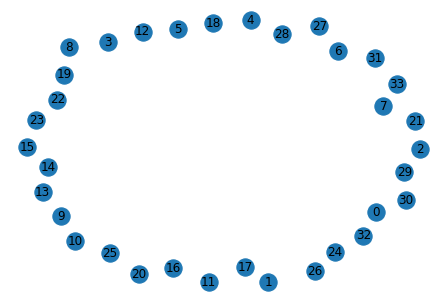

In [48]:
nx.draw(G,with_labels=True)

In [56]:
liste

[(0, 31),
 (0, 2),
 (0, 8),
 (13, 33),
 (19, 33),
 (2, 32),
 (1, 30),
 (1, 2),
 (2, 3),
 (2, 7),
 (2, 13),
 (9, 33),
 (2, 9),
 (27, 33),
 (2, 27),
 (23, 33),
 (23, 32),
 (23, 29),
 (31, 33),
 (31, 32),
 (28, 33),
 (2, 8),
 (0, 5),
 (0, 6),
 (0, 4),
 (0, 10),
 (26, 29),
 (26, 33),
 (28, 31),
 (0, 11),
 (8, 30),
 (3, 12),
 (0, 12),
 (3, 7),
 (3, 13),
 (8, 32),
 (8, 33),
 (14, 32),
 (14, 33),
 (0, 3),
 (1, 3),
 (15, 32),
 (15, 33),
 (0, 7),
 (1, 7),
 (18, 32),
 (18, 33),
 (0, 13),
 (1, 13),
 (20, 32),
 (20, 33),
 (5, 16),
 (6, 16),
 (24, 31),
 (25, 31),
 (0, 17),
 (1, 17),
 (22, 32),
 (22, 33),
 (0, 19),
 (0, 21),
 (0, 1),
 (29, 32),
 (29, 33),
 (1, 19),
 (4, 6),
 (5, 10),
 (23, 25),
 (24, 27),
 (30, 32),
 (30, 33),
 (1, 21),
 (2, 28),
 (4, 10),
 (5, 6),
 (23, 27),
 (24, 25),
 (32, 33)]

# remonter en comptant les communauté
Newman_Durvan marche, mtn nous allons refaire les arêtes pas à pas en enregistrant les communauté.

{0: [0, 1, 21, 19, 17, 13, 7, 3, 12, 11, 5, 6, 4, 10, 16], 2: [2, 28, 24, 25, 23, 27, 31, 26, 8, 14, 15, 18, 20, 22, 29, 30, 32, 33, 9]}


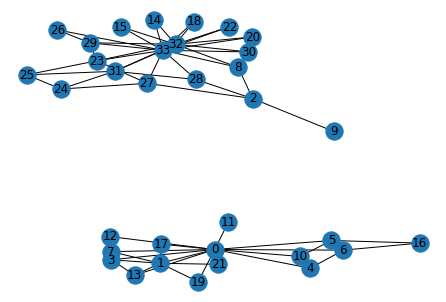

In [7]:
def communaute(nombre_com,G):
    liste= Newman_Durvan(G)
    comm={}
    k=0
    for sommet in G.nodes():
        comm[k]=[sommet]
        k+=1

    def trouver_classe(point):
        for classe,points in comm.items():
            if point in points:
                return classe

    i=1 
    while len(comm)>nombre_com and i<=len(liste): #tester si marche pour 1 communauté
        arete=liste[len(liste)-i]
        
        classe1=trouver_classe(arete[0])
        classe2=trouver_classe(arete[1])

        if classe1!=classe2:
            comm[classe1]+=comm[classe2]
            del comm[classe2]
            
        G.add_edge(arete[0],arete[1])
        
        i+=1

    return comm

G = nx.karate_club_graph()
resultat=communaute(2,G)
print(resultat)
nx.draw(G,with_labels=True)


# Détection 4 communauté d'un graphe aléatoire:

In [8]:
def matrice_proba(n):
    mat = abs(np.random.random((n, n))) #genere une matrice nxn de valeur aléatoire
    proba=mat*0
    diag=np.copy(proba)
    for i in range(n):
        proba[i,i:]=mat[i,i:]
        diag[i,i]=mat[i,i]

    proba=proba + proba.T
    proba=proba-2*diag
    
    return proba


def matrice_adj(n,pin):
    proba=matrice_proba(n)
    adj=np.eye(n)*0 #on part d'une matrice avec que des 0
    pout=(16-31*pin)/96 #deduction de pout
    
    # communauté 1
    for i in range(32):
        for j in range(i+1,32):
            if pin >= proba[i][j]:
                adj[i,j]=1
                adj[j,i]=1 #remplir la transposé
            else: 
                adj[i,j]=0
                adj[j,i]=0
    
    for i in range(32):
        for j in range(32,n):
            if pout > proba[i][j] and j!=i:
                    adj[i,j]=1
                    adj[j,i]=1
            else: 
                adj[i,j]=0
                adj[j,i]=0
    
    #communauté 2
    for i in range(32,64):
        for j in range(i+1,64):
            if pin >= proba[i][j]:
                adj[i,j]=1
                adj[j,i]=1
            else: 
                adj[i,j]=0
                adj[j,i]=0

    for i in range(32,64):
        for j in range(64,n):
            if pout > proba[i][j]:
                    adj[i,j]=1
                    adj[j,i]=1
            else: 
                adj[i,j]=0
                adj[j,i]=0
    
    #communauté 3
    for i in range(64,96):
        for j in range(i+1,96):
            if pin >= proba[i][j]:
                adj[i,j]=1
                adj[j,i]=1
            else: 
                adj[i,j]=0
                adj[j,i]=0

    for i in range(64,96):
        for j in range(96,n):
            if pout > proba[i][j]:
                    adj[i,j]=1
                    adj[j,i]=1
            else: 
                adj[i,j]=0
                adj[j,i]=0

    #communauté 4
    for i in range(96,n):
        for j in range(i+1,n):
            if pin >= proba[i][j]:
                adj[i,j]=1
                adj[j,i]=1
            else: 
                adj[i,j]=0
                adj[j,i]=0

    return adj   

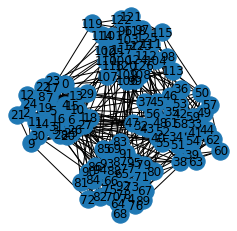

In [32]:
G1 = nx.from_numpy_matrix(matrice_adj(128, 0.516-0.07))
fix, ax = plt.subplots(1, 1,figsize=(4,4))
nx.draw(G1, with_labels=True, ax=ax)

{4: [4, 22, 21, 17, 12, 2, 0, 3, 14, 10, 20, 1, 19, 9, 6, 5, 8, 11, 7, 15, 18, 16, 24, 28, 30, 25, 26, 29, 27, 23, 31, 13], 38: [38, 47, 46, 36, 50, 54, 39, 37, 32, 33, 44, 35, 55, 34, 42, 49, 45, 41, 40, 51, 52, 53, 58, 43, 48, 61, 56, 57, 59, 62, 60, 63], 81: [81, 94, 84, 90, 72, 66, 91, 76, 65, 73, 82, 69, 64, 71, 86, 70, 67, 77, 78, 68, 79, 93, 95, 88, 89, 92, 80, 74, 87, 83, 85, 75], 100: [100, 102, 113, 116, 106, 120, 107, 97, 98, 99, 108, 103, 96, 110, 109, 101, 105, 111, 114, 121, 122, 125, 117, 127, 112, 126, 104, 123, 118, 115, 124, 119]}


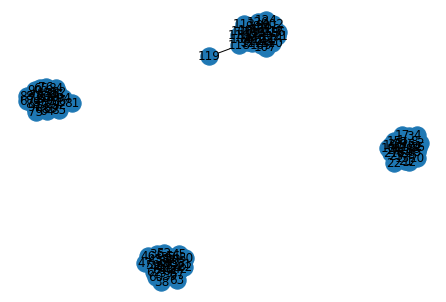

In [33]:
resultat=communaute(4,G1)
print(resultat)
nx.draw(G1,with_labels=True)

In [38]:
resultat[100].sort()
print(resultat[100],len(resultat[100]))

[96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127] 32
